# 0 day

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
class HomoSapiens:
    _STATUS = [
        'ALIVE',
        'DEAD'
    ]
    
    def __init__(self):
        self.coords = (np.random.randint(0, 101), np.random.randint(0, 101))
        self.health = 100
        self.current_status = self._STATUS[0]
    
    def get_position(self):
        return self.coords
    
    def set_position(self, new_coords):
        if self.am_i_alive():
            self.coords = new_coords
    
    def lost_health(self):
        self.health -= np.random.randint(0, 100)
        
    def show_health(self):
        return self.health
    
    def am_i_alive(self)->bool:
        return self.current_status == self._STATUS[0]
    
    def dead(self):
        self.current_status = self._STATUS[1]
        
    def nothing(self):
        pass


class Human(HomoSapiens):
    def __init__(self):
        super().__init__()
        
    def reborn_to_a_zombie(self):
        self.__class__ = Zombie
    
    def collision(self):
        if not self.am_i_alive(): return
        self._STATE = {
            'Dead': 0.1,
            'Bitten': 0.3,
            'Lost Health': 0.3,
            'Nothing': 0.3
        }
        self._HEALTH = {
            'Dead': self.dead,
            'Bitten': self.reborn_to_a_zombie,
            'Lost Health': self.lost_health,
            'Nothing': self.nothing,
        }
        self._HEALTH[np.random.choice(list(self._STATE.keys()), p=list(self._STATE.values()))]()


class Zombie(HomoSapiens):
    def __init__(self):
        super().__init__()
        
    def collision(self):
        if not self.am_i_alive(): return
        self._STATE = {
            'Dead': 0.1,
            'Bit': 0.3,
            'Ate': 0.2,
            'Lost Health': 0.2,
            'Nothing': 0.2
        }
        self._HEALTH = {
            'Dead': self.dead,
            'Bit': self.nothing,
            'Ate': self.nothing,
            'Lost Health': self.lost_health,
            'Nothing': self.nothing,
        }
        self._HEALTH[np.random.choice(list(self._STATE.keys()), p=list(self._STATE.values()))]()
    


In [3]:
h = Human()
print(type(h))
h.reborn_to_a_zombie()
print(type(h))

<class '__main__.Human'>
<class '__main__.Zombie'>


In [4]:
h = Human()
for _ in range(10):
    h.collision()
    print(h.current_status, type(h))

ALIVE <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>
DEAD <class '__main__.Human'>


In [17]:
class ZombieApocalypse():
    def __init__(self, humans=100, zombies=10):
        self.humans = self.create(Human, humans)
        self.zombies = self.create(Zombie, zombies)
        
    def create(self, class_name, amount):    
        return [class_name() for _ in range(amount)]  
    
    def show_info(self):
        print(f'HUMANS: {len(self.humans)}, ZOMBIES: {len(self.zombies)}')
    
    def collision(self):
        r = {'Human': None, 'Zombie': None}
        if self.humans and self.zombies:
            r['Human'] = np.random.choice(self.humans)
            r['Human'].collision()
            r['Zombie'] = np.random.choice(self.zombies)
            r['Zombie'].collision()
            return self.check_collision(r)
        
        return 'Run out of zombies or humans'
    
    def check_collision(self, pair):
        h_status, h_id = pair['Human'].current_status, self.humans.index(pair['Human'])
        z_status, z_id = pair['Zombie'].current_status, self.zombies.index(pair['Zombie'])
        
        if not pair['Zombie'].am_i_alive():
            self.zombies.remove(pair['Zombie'])
        if not pair['Human'].am_i_alive():
            self.humans.remove(pair['Human'])
        
        if isinstance(pair['Human'], Zombie):
            self.humans.remove(pair['Human'])
            self.zombies.append(pair['Human'])
        
        return f"HUMAN: #{h_id}|{h_status}|(amnt:{len(self.humans)}) / ZOMBIE: #{z_id}|{z_status}|(amnt:{len(self.zombies)})"
    
    def stat(self):
        print(f'Left {len(self.humans)} Humans.')
        print(f'Left {len(self.zombies)} Zombies.')
    
    def visualize(self):
        h_coords = {'x': [], 'y': []}
        z_coords = {'x': [], 'y': []}
        
        for h, z in zip(self.humans, self.zombies):
            h_coords['x'].append(h.get_position()[0])
            h_coords['y'].append(h.get_position()[1])
            z_coords['x'].append(z.get_position()[0])
            z_coords['y'].append(z.get_position()[1])
        
        fig, ax = plt.subplots()
        ax.scatter(h_coords['x'], h_coords['y'], c='pink', label='Humans')
        ax.scatter(z_coords['x'], z_coords['y'], c='g', label='Zombies')
        ax.legend()
        

Left 25 Humans.
Left 5 Zombies.


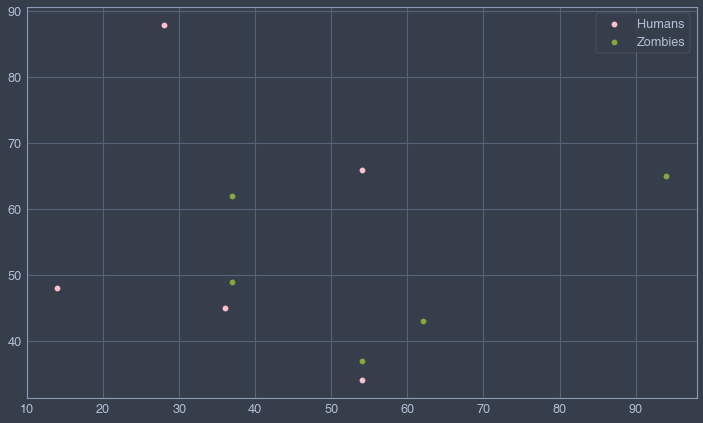

In [18]:
za = ZombieApocalypse(25, 5)
za.stat()
za.visualize() # before collisions

Left 2 Humans.
Left 16 Zombies.


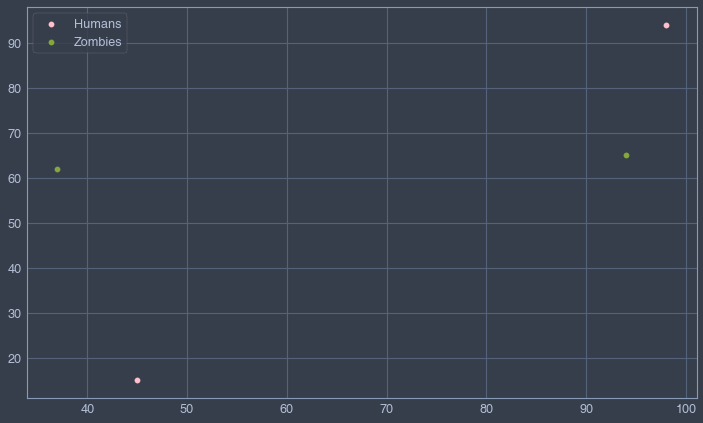

In [20]:
za.stat()
za.visualize() # after collisions

In [19]:
for i in range(50):
    print(i, za.collision())

0 HUMAN: #11|ALIVE|(amnt:25) / ZOMBIE: #0|ALIVE|(amnt:5)
1 HUMAN: #24|ALIVE|(amnt:25) / ZOMBIE: #2|ALIVE|(amnt:5)
2 HUMAN: #2|DEAD|(amnt:24) / ZOMBIE: #4|ALIVE|(amnt:5)
3 HUMAN: #3|ALIVE|(amnt:23) / ZOMBIE: #1|ALIVE|(amnt:6)
4 HUMAN: #21|ALIVE|(amnt:23) / ZOMBIE: #0|ALIVE|(amnt:6)
5 HUMAN: #16|ALIVE|(amnt:23) / ZOMBIE: #3|ALIVE|(amnt:6)
6 HUMAN: #20|ALIVE|(amnt:23) / ZOMBIE: #1|ALIVE|(amnt:6)
7 HUMAN: #17|ALIVE|(amnt:22) / ZOMBIE: #3|ALIVE|(amnt:7)
8 HUMAN: #7|ALIVE|(amnt:21) / ZOMBIE: #6|ALIVE|(amnt:8)
9 HUMAN: #11|ALIVE|(amnt:21) / ZOMBIE: #6|DEAD|(amnt:7)
10 HUMAN: #1|ALIVE|(amnt:21) / ZOMBIE: #6|ALIVE|(amnt:7)
11 HUMAN: #4|ALIVE|(amnt:20) / ZOMBIE: #0|ALIVE|(amnt:8)
12 HUMAN: #4|ALIVE|(amnt:20) / ZOMBIE: #6|ALIVE|(amnt:8)
13 HUMAN: #5|ALIVE|(amnt:19) / ZOMBIE: #5|ALIVE|(amnt:9)
14 HUMAN: #17|ALIVE|(amnt:19) / ZOMBIE: #3|ALIVE|(amnt:9)
15 HUMAN: #6|ALIVE|(amnt:18) / ZOMBIE: #5|ALIVE|(amnt:10)
16 HUMAN: #10|ALIVE|(amnt:17) / ZOMBIE: #2|ALIVE|(amnt:11)
17 HUMAN: #0|DEAD|(amnt:16) / ZO

In [25]:
humans = [Human() for i in range(10)]
zombies = [Zombie() for i in range(10)]

In [26]:
h_coords = {'x': [], 'y': []}
z_coords = {'x': [], 'y': []}
for h, z in zip(humans, zombies):
    h_coords['x'].append(h.get_position()[0])
    h_coords['y'].append(h.get_position()[1])
    z_coords['x'].append(z.get_position()[0])
    z_coords['y'].append(z.get_position()[1])

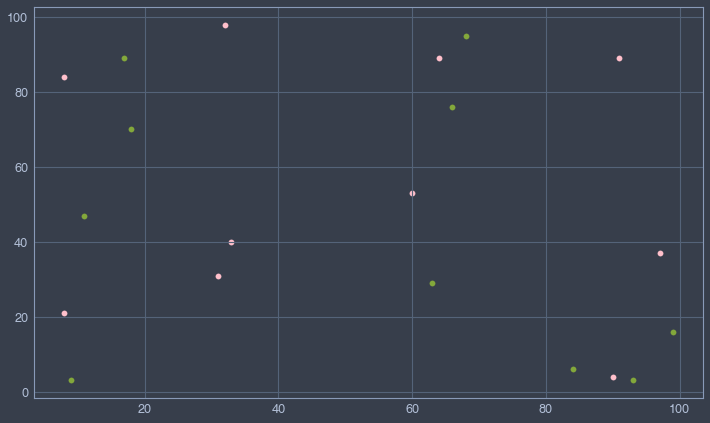

In [29]:
fig, ax = plt.subplots()
ax.scatter(h_coords['x'], h_coords['y'], c='pink')
ax.scatter(z_coords['x'], z_coords['y'], c='g')